
<div style=" display: flex; align-items: center; justify-content: space-between; padding: 20px; border-bottom: 3px solid #1f2937;">
    <div style="flex: 1; text-align: left;">
        <img src="Images/Elevvo Logo.png" style="height:80px;">
    </div>
    <div style="flex: 2; text-align: center;">
        <h1 style="margin:0; font-size:28px; font-weight:700;">
        Forest Cover Type Classification
        </h1>
    </div>
    <div style="flex: 1; text-align: right;">
        <img src="Images/logo.png" style="height:100px;">
    </div>
</div>

### Classification of Forest Cover Types

#### Purpose

The purpose of this project is to implement a multi-class machine learning problem - specifically the classification of a dominant forest cover type within a certain area based on cartographic and ecological data.

The data set for this project is taken from the Covertype data set (from uci.edu) which has a total of 581,012 records (observations) and 54 (predictive) features: 

1. Elevation and physical characteristics of terrain 
2. Vertical and horizontal distance to Hydrology 
3. Distance to roads and fire areas 
4. Hillshade readings from multiple times throughout the day 
5. A one hot encoded variable indicating if the area is located in a Wilderness Area 
6. A one hot encoded variable indicating the type of soil present.

There are 7 classes of forest cover types that make up the target feature.

The purpose of this project is:
1. To analyse the class imbalance in the target variable. 
2. To create and train tree-based models to predict the forest cover type based on the provided predictive features. 
3. To compare the Random Forest algorithm and the XGBoost algorithm for predicting the forest cover type. 
4. To use robust multi-class metrics to evaluate the model's performance. 
5. To perform feature importance analysis for the predictive features used for creating the model.

### Research Methodology

Data Exploration

- Completed data exploration for the dataset. The dataset contained no missing values so it is complete. 
- Checked to see if the classes were represented in an imbalanced manner when checking class distribution. 
- Investigated how the numerical features were distributed. 
- Evaluated the correlations and how they worked together among the features.

Class Imbalance Handling

Class weighting was used for class imbalance in the dataset because the other two methods - oversampling and SMOTE - would distort the new one-hot feature variables.

Model Training

The data was trained to produce two different tree models for use in analysis.

- Class weight was applied to the Random Forest model.
- Sample weight and adjusted label were utilized for the XGBoost model.
 
Evaluation Metrics

- Accuracy
- Precision
- Recall
- F1- macro and weighted
-Confusion Matrix

In [1]:
# Import Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

In [2]:
# Load Dataset
file_path = "dataset\covtype.csv"

df = pd.read_csv(file_path)
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\MSI\AppData\Local\Temp\ipykernel_19640\4035600433.py:2: SyntaxWarning: invalid escape sequence '\c'
  file_path = "dataset\covtype.csv"


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


# Dats Analysis

In [3]:
# Dataset Shape & Structure
print("Dataset Shape:", df.shape)
print("\nColumn Types:\n")
print(df.dtypes.value_counts())

print("\nBasic Information:\n")
df.info()

Dataset Shape: (581012, 55)

Column Types:

int64    55
Name: count, dtype: int64

Basic Information:

<class 'pandas.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1        

In [4]:
# Numerical Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [5]:
# Missing Values Check
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

Cover_Type
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
Name: count, dtype: int64


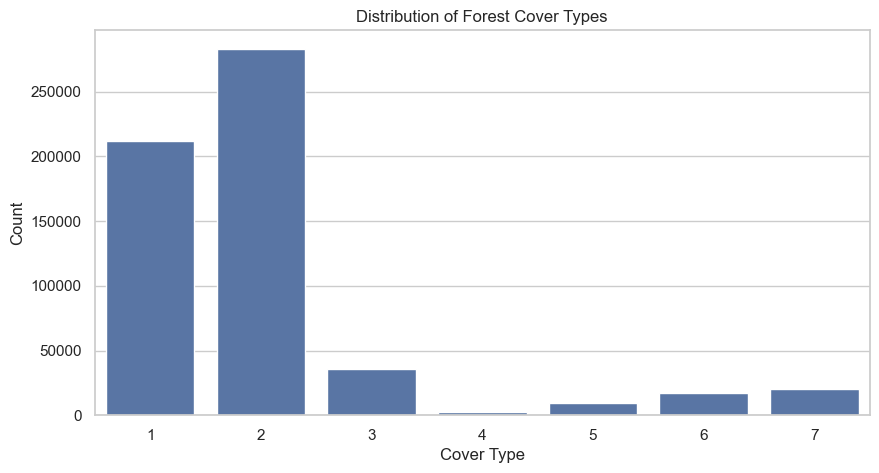

In [6]:
# Target Distribution
target_counts = df["Cover_Type"].value_counts().sort_index()

print(target_counts)

# Plot class distribution
plt.figure()
sns.countplot(x="Cover_Type", data=df)
plt.title("Distribution of Forest Cover Types")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()

Based on the graph, it appears that forest cover types are very lopsided and are not equally distributed between each of the seven classes of forest cover. The largest number of samples (approximately 280,000) is in Cover Type 2, followed by Cover Type 1 with just over 210,000. Conversely, the other cover types are also imbalanced; for example, Cover Type 3 has around 35,000 samples, while Cover Types 5, 6 and 7 each have between 8,000 and 20,000 samples. Cover Type 4 has the most severe imbalance, as there are very few (less than 5,000) samples associated with Cover Type 4. Because of this high degree of class imbalance, Cover Types 1 and 2 will dominate the overall dataset and bias prediction models toward these majority classes, while reducing the performance of the models on the minority class(es). To overcome this considerable degree of class imbalance, it may be necessary to resample the dataset, apply class weighting or create synthetic data (e.g., using SMOTE), so that the model learning is balanced and that the classification performance is fair across all of the different forest cover types.

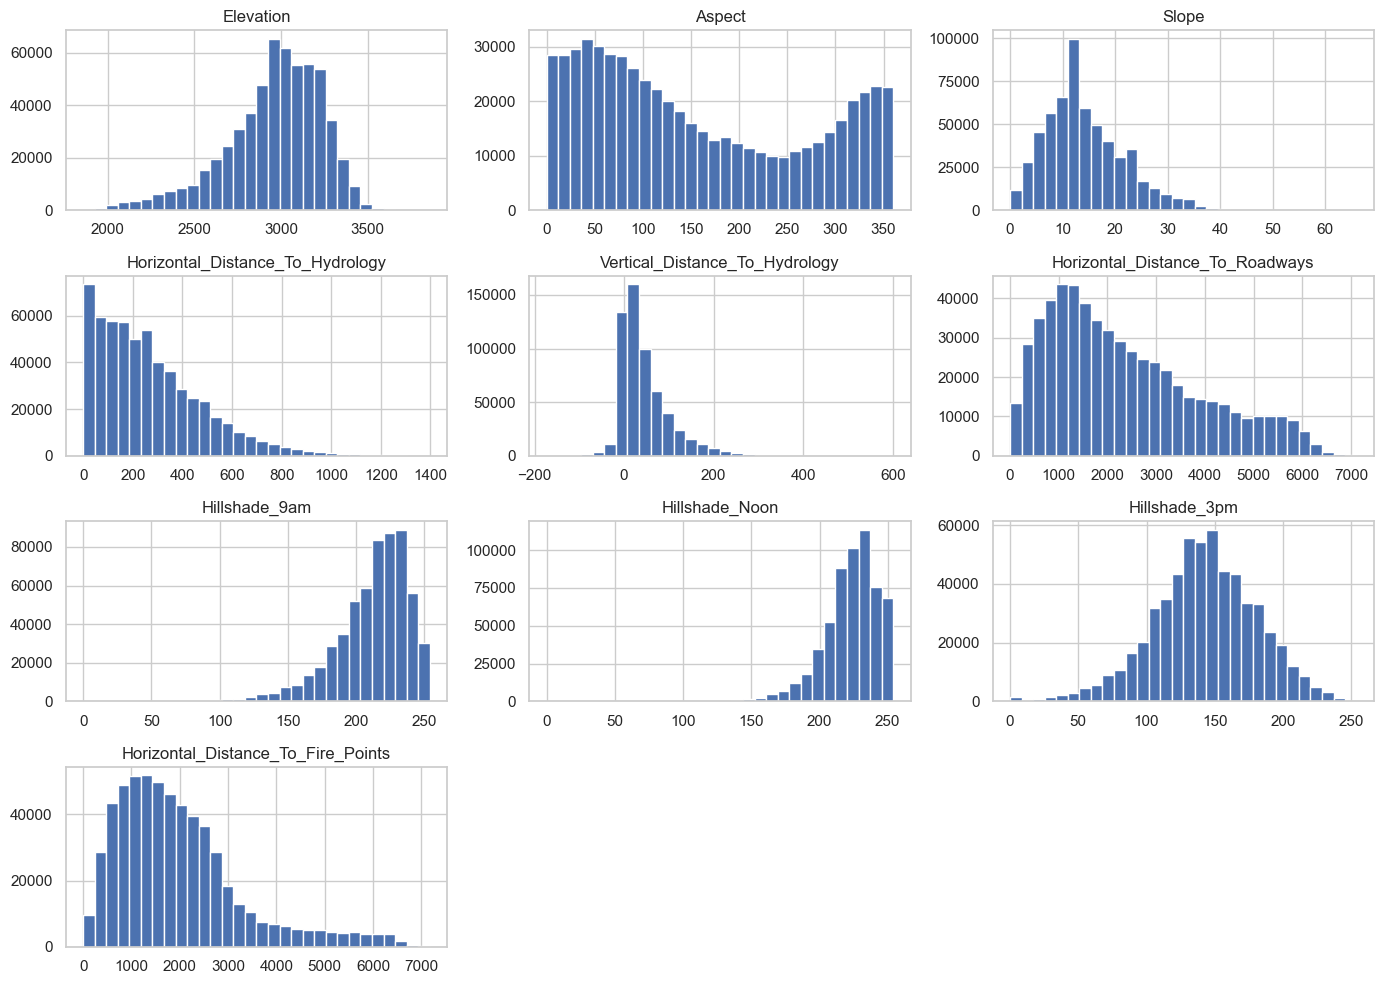

In [7]:
# Numerical Features Exploration
numerical_cols = [
    "Elevation", "Aspect", "Slope",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

df[numerical_cols].hist(bins=30, figsize=(14, 10))
plt.tight_layout()
plt.show()

Environmental features revealed different types of distributions through histograms. **Elevation** was normally distributed with values occurring within the approximate range of 2800 m to 3100 m, with the majority of observations occurring at mid-range to high elevations. **Aspect** had a largely uniform distribution across 0 degrees to 360 degrees (as well as slightly wavy), demonstrating that there are terrain orientations across the wide availability of available land area. **Slope** displayed a right-skewed distribution with the majority of land being at 5 to 20 degrees slope and a negligible number of steep slopes existing. **Horizontal Distance to Hydrology** and **Horizontal Distance to Fire Points** both exhibited significantly right-skewed distributions, so most observations occurred close to the water sources and fire points while few observations occurred at remote distances. **Horizontal Distance to Roadways** was also right-skewed; however, there were a greater number of remote observations from roadways than water sources and fire points. **Vertical Distance to Hydrology** was clustered closely around lesser values of positive distance, suggesting that the majority of the observations were slightly elevated from water sources, with fewer than a handful of extreme values. Three different models of the same three **Hillshade variables (9am, Noon, 3pm)** were generally clustered together in the same range of values and showed that the degree of intensity for each hour was generally similar (particularly at noon) for all three hours where sunlight was present. Overall, most distance-related variables were distributed more heavily positively, indicating that scaling or transforming the data with transformation techniques (such as log) could improve model performance; the distribution of both elevation and hillshade variables appeared well-distributed and resolved in terms of fitting for modeling.

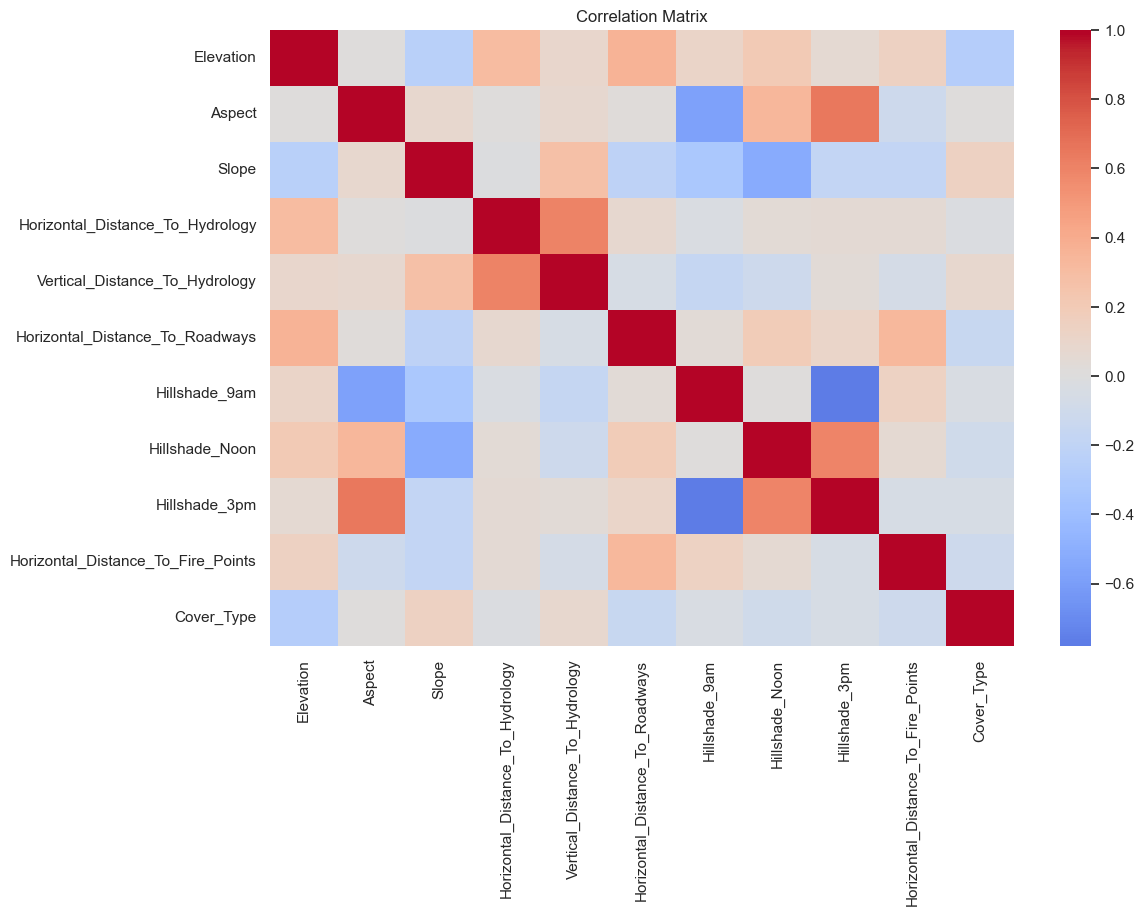

In [8]:
# Correlation Matrix
corr_matrix = df[numerical_cols + ["Cover_Type"]].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

The relatedness of many of the environmental variables can be seen in the correlation matrix. Most of the features show **weak or moderate results for correlation**, suggesting a below average amount of multicollinearity across the board. There was a strong positive correlation between **Horizontal Distance to Hydrology** and **Vertical Distance to Hydrology**, as expected, due to both variables measuring the same thing, i.e. how close you are to the water in different directions. The three **Hillshade Variables (9am, Noon, 3pm)** also have moderate correlations among themselves, with Hillshade_Noon being most correlated to Hillshade_3pm, indicating that there is a consistent amount of sun shining on the area during these times of day. The elevation of an area has moderate correlations with select distance variables, suggesting that as you increase in elevation you are further away from water and roadways.


The target variable, **Cover_Type**, is not well correlated with any of the individual features (generally weak correlations), indicating that no single feature will be the primary determinant for what forest cover type an area has. Thus, the classification of forest cover type will involve **nonlinear interactions between many of the features**, so tree-based models and/or ensembles will be well suited for this task. Overall, the dataset does not suggest that there is a strong multicollinearity problem; however, care may need to be taken with respect to the hydrology and hillshade features during the model development phase, as they have significant levels of correlation between each other.

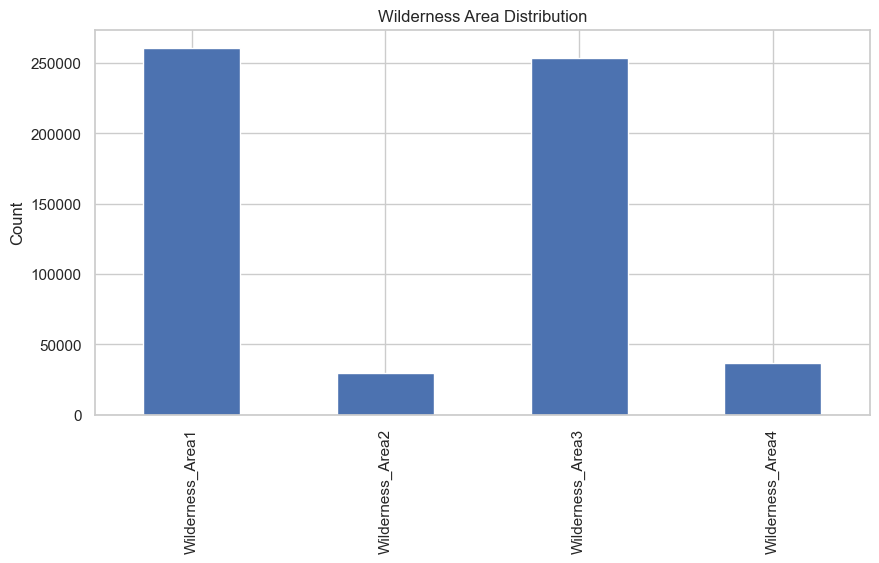

In [9]:
# Wilderness Area Distribution
wilderness_cols = [col for col in df.columns if "Wilderness_Area" in col]

df[wilderness_cols].sum().plot(kind="bar")
plt.title("Wilderness Area Distribution")
plt.ylabel("Count")
plt.show()

The mapping of Wilderness Areas reveals a large discrepancy among the four regions. Each of the two regions (Wilderness_Area1 and Wilderness_Area3) has around 250k - 260k data points. They account for the majority of our sample size. In contrast, Wilderness_Area2 and Wilderness_Area4 only represent about 30k - 40k data points each, greatly reducing the amount of sample size available. As a result, the current climate will likely cause a bias towards geographic areas in predictive modelling due to the heavy reliance on the two geographic areas producing 250k to 260k samples. Models trained using this data set will likely build patterns specific to the Wilderness Area and will not work effectively in the regions with fewer samples. In this case, it could prove worthwhile to evaluate the effectiveness of the model in developing regional bias through Wilderness Areas or to implement stratified sampling techniques to obtain balanced generalization across the five geographic areas.

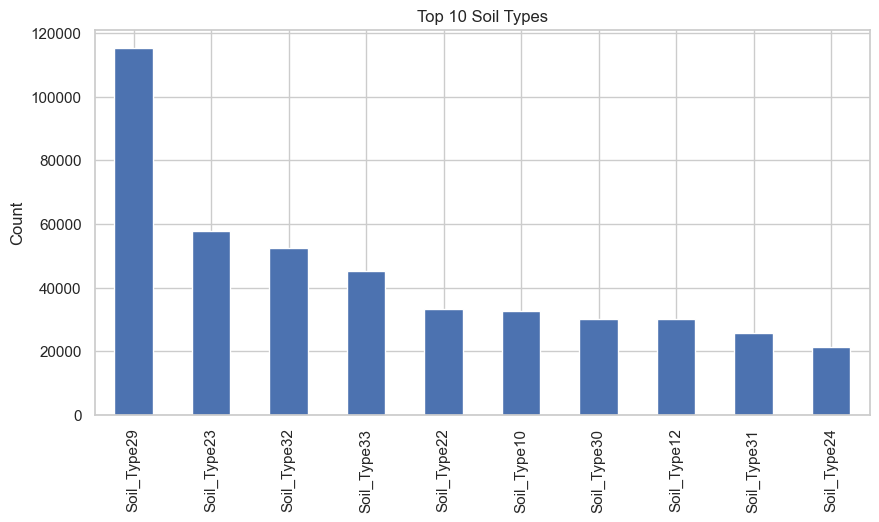

In [10]:
# Soil Type Distribution (Top 10)
soil_cols = [col for col in df.columns if "Soil_Type" in col]

soil_counts = df[soil_cols].sum().sort_values(ascending=False)

soil_counts.head(10).plot(kind="bar")
plt.title("Top 10 Soil Types")
plt.ylabel("Count")
plt.show()

According to the total number of soil sample distributions, there appears to be a clear imbalance for each of the different [soil] classifications. An example of this would be **Soil_Type29**, which has approximately 115,000 total observations (which will be nearly more than double the total number of observations of almost all other [soil] types). After **Soil_Type29**, **Soil_Type23**, **Soil_Type32**, and **Soil_Type33** all have total sample sizes with an approximate total of samples that range anywhere from about 45,000–60,000. The remaining eight [soil] types included in the Top 10 [soil] types (e.g., **Soil_Type22**, **Soil_Type10**, **Soil_Type30**, **Soil_Type12**, **Soil_Type31** and **Soil_Type24**) have total sample sizes that range from approximately 20,000–35,000.

These figures show a distribution where certain [soil] types have a considerably larger total number of observations than other [soil] types. This skew in the total sample size per [soil] type may lead to higher importance of the frequently occurring characteristics of the most common [soil] types in the model training process. Given that the [soil] type is one of the key ecological factors to be used for predicting forest cover in the model training process, this imbalance in the number of observations of each [soil] type implies that the model could find stronger relationships that apply to more frequently occurring [soil] types. As such, it may be beneficial to review the importance of features as well as to employ regularization types of methodologies to balance the learning across the various [soil] types.

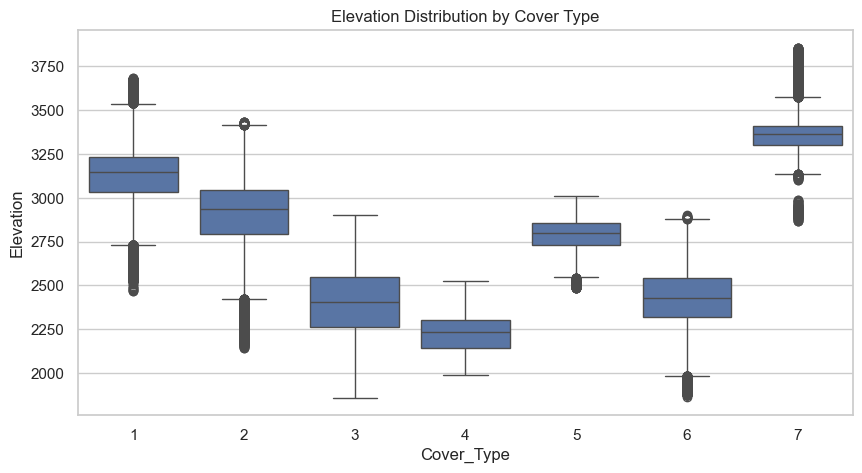

In [11]:
# Elevation vs Cover Type
plt.figure()
sns.boxplot(x="Cover_Type", y="Elevation", data=df)
plt.title("Elevation Distribution by Cover Type")
plt.show()

By examining the seven different forest cover types on the boxplot we see that elevation plays a significant role in discerning between the seven different forest cover types. **Cover Type 7** will always have a higher elevation as it is the highest range of elevation, from 3,300-3,400 m, with a large number of outliers above that range. **Cover Types 1 and 2** also have elevation; however, they are marginally less than **Cover Type 7**. Conversely, **Cover Types 3 and 4** are primarily located at lower elevations, particularly **Cover Type 4**, which has the lowest median value for elevation, around 2,200 m, and also has the smallest interquartile range (IQR) from the 25'th percentile to the 75'th percentile, indicating that the elevations are more consistent. **Cover Types 5 and 6** exist at a moderate elevation level with moderate variability. The distinct differences among the separation of the boxplots contain a significant elevation difference between the several high-elevation boxplots (Types 1, 2, and 7) and the low-elevation boxplots (Types 3 and 4), suggesting that elevation plays a significant role in distinguishing between the seven different forest cover types and will likely serve as a very strong predictive feature within classification models.

# Data Preprocessing

In [12]:
# Stratified Train/Test Split
X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Keep class proportions consistent
)

def show_class_distribution(y_series, title):
    counts = y_series.value_counts().sort_index()
    perc = (counts / counts.sum() * 100).round(2)
    dist = pd.DataFrame({"count": counts, "percent": perc})
    print(f"\n{title}\n", dist)

show_class_distribution(y_train, "Train Distribution (Raw)")
show_class_distribution(y_test, "Test Distribution (Raw)")


Train Distribution (Raw)
              count  percent
Cover_Type                 
1           169472    36.46
2           226640    48.76
3            28603     6.15
4             2198     0.47
5             7594     1.63
6            13894     2.99
7            16408     3.53

Test Distribution (Raw)
             count  percent
Cover_Type                
1           42368    36.46
2           56661    48.76
3            7151     6.15
4             549     0.47
5            1899     1.63
6            3473     2.99
7            4102     3.53


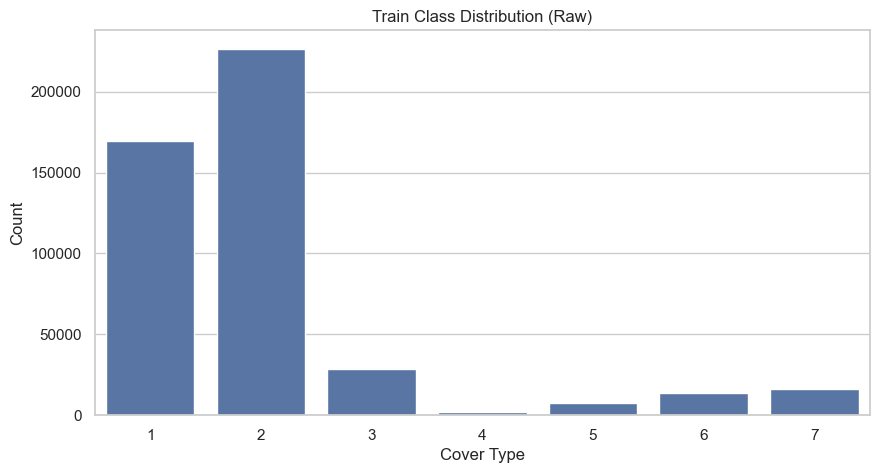

In [13]:
# Plot Raw Class Distribution (Train)
train_counts = y_train.value_counts().sort_index()

plt.figure()
sns.barplot(x=train_counts.index, y=train_counts.values)
plt.title("Train Class Distribution (Raw)")
plt.xlabel("Cover Type")
plt.ylabel("Count")
plt.show()

The distribution of the training set by class shows significant differences among the seven different forest covers, which form the basis for analysis. **Cover Type 2** has the greatest number of samples (approximately 225,000) with **Cover Type 1** the next greatest (about 170,000). Together, these two classes represent the bulk of the training dataset.

In comparison, there are significantly fewer samples for **Cover Types 3, 5, 6, and 7**, and **Cover Type 4** is very underrepresented, with very few samples taken from it.

Because of this imbalance, a model developed using this data may be biased to predict the larger sample sizes (i.e., Types 1 and 2); thus, a possible result may be that Type 4 will have a lower recall. In order to counterbalance potential bias, techniques such as class weighting or resampling can be implemented along with stratified evaluation metrics (i.e., macro F1-score) when measuring the performance of the models against the cover types.

In [14]:
# Compute Class Weights (Balanced)
classes = np.unique(y_train)

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=classes,
    y=y_train
)

class_weight_dict = dict(zip(classes, class_weights))

print("Class Weights:")
for c, w in class_weight_dict.items():
    print(f"  Class {c}: {w:.4f}")

Class Weights:
  Class 1: 0.3918
  Class 2: 0.2930
  Class 3: 2.3215
  Class 4: 30.2099
  Class 5: 8.7439
  Class 6: 4.7791
  Class 7: 4.0469


In [15]:
# Create Sample Weights for Training
sample_weight_train = y_train.map(class_weight_dict).astype(float)

# Verify "balanced influence": total weight per class should be ~ equal
weighted_mass = sample_weight_train.groupby(y_train).sum().sort_index()
raw_counts = y_train.value_counts().sort_index()

summary = pd.DataFrame({
    "raw_count": raw_counts,
    "raw_percent": (raw_counts / raw_counts.sum() * 100).round(2),
    "weighted_mass": weighted_mass.round(2),
    "weighted_percent": (weighted_mass / weighted_mass.sum() * 100).round(2)
})

print(summary)

            raw_count  raw_percent  weighted_mass  weighted_percent
Cover_Type                                                         
1              169472        36.46       66401.29             14.29
2              226640        48.76       66401.29             14.29
3               28603         6.15       66401.29             14.29
4                2198         0.47       66401.29             14.29
5                7594         1.63       66401.29             14.29
6               13894         2.99       66401.29             14.29
7               16408         3.53       66401.29             14.29


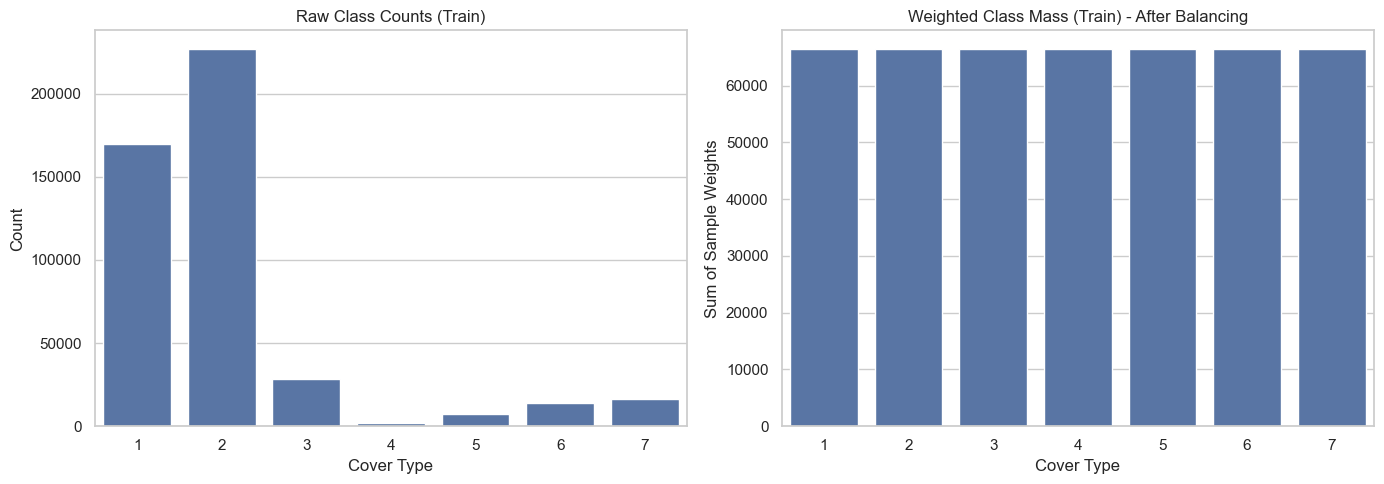

In [16]:
# Plot: Raw Counts vs Weighted Mass
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw counts
sns.barplot(x=raw_counts.index, y=raw_counts.values, ax=axes[0])
axes[0].set_title("Raw Class Counts (Train)")
axes[0].set_xlabel("Cover Type")
axes[0].set_ylabel("Count")

# Weighted mass
sns.barplot(x=weighted_mass.index, y=weighted_mass.values, ax=axes[1])
axes[1].set_title("Weighted Class Mass (Train) - After Balancing")
axes[1].set_xlabel("Cover Type")
axes[1].set_ylabel("Sum of Sample Weights")

plt.tight_layout()
plt.show()

On the left side of the first image you see how big of a problem this is. Cover Type 1 and Cover Type 2 have a lot more instances (i.e. samples) than all the other Cover Types put together! Cover Type 2 has the most instances, then Cover Type 1, while Cover Type 4 has almost none! Cover Types 3, 5, 6, and 7 have even fewer instances than Cover Type 4 which can create bias for a model trained on these data by predicting predominantly Cover Type 1 and Cover Type 2. 

The right side of the first image shows how close all of the classes are to having equal weight after using the class weighting scheme. The effective total weight of each Cover Type is almost the same, meaning there are enough instances across all Cover Types to ensure that the model “knows” how to predict any Cover Type, reducing the bias toward Cover Types 1 and 2 and aiding in creating a more even distribution of classification accuracy for the different Cover Types. Thus, the dataset has been balanced, by using a class weighting methodology, without altering the original distribution of instances of each Cover Type.

# Model Training & Evaluation

In [17]:
# Modeling Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

import xgboost as xgb

## 1️⃣ Random Forest (Balanced)

In [18]:
# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight=class_weight_dict
)

rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)

## Random Forest Evaluation

In [19]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_preds)

print("Random Forest Accuracy:", round(rf_accuracy, 4))
print("\nClassification Report:\n")
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.9551

Classification Report:

              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.91      0.85      0.88       549
           5       0.95      0.79      0.86      1899
           6       0.94      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



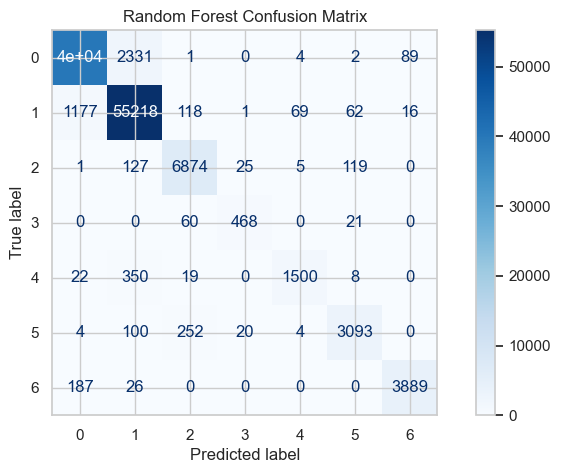

In [20]:
# Confusion Matrix - RF
cm_rf = confusion_matrix(y_test, rf_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

The Random Forest confusion matrix demonstrates effective classification performance overall, with approximately all predictive results falling on the diagonal line of the confusion matrix. This indicates that all seven cover types are classified correctly, with more than two-thirds of predictions having occurred in 1 of the 2 dimensions, true positives for each class. The majority of classes (i.e. Class 0 and Class 1) have a high number of true positive counts due to their large sample size (N = 100% of each class).

Class 2 and Class 6 also perform reasonably well in terms of both the number of correct classifications (35% to 50%) and the rate of misclassification from all other classes (8%).

While this analysis shows that there are low rates of misclassification overall, some degree of confusion between certain classes is apparent. Specifically, Class 0 and Class 1 exhibit relatively high rates of overlap (cross-classification) and may therefore be confused with each other, a potential result of their ecologically similar environments. Class 2 was also moderately confused with Class 5, and Class 1 was moderately confused with Class 4 (cross-classification).

Although significant misclassifications have occurred with regard to the dominant classes (Class 0 and Class 1), the rates at which minority classes (Classes 2, 4, 5, 6) were correctly classified suggest that the class balancing strategy implemented has prevented extreme biases from developing towards dominant classes.

In summary, this random forest provides good classification accuracy for the dominant classes but also demonstrates moderate overlap between classes that are similarly ecologically based (but with limited inter-class variability). More distinct separation between overlapping classes may be obtained through additional feature engineering, hyperparameter tuning, or additional ensemble optimisation.

## 2️⃣ XGBoost (Balanced)

In [23]:
y_train_xgb = y_train - 1
y_test_xgb  = y_test - 1

# Rebuild class weights dict for 0..6
classes_xgb = np.unique(y_train_xgb)

class_weights_xgb = compute_class_weight(
    class_weight="balanced",
    classes=classes_xgb,
    y=y_train_xgb
)

class_weight_dict_xgb = dict(zip(classes_xgb, class_weights_xgb))

# Build sample weights using the new labels
sample_weight_train_xgb = y_train_xgb.map(class_weight_dict_xgb).astype(float)

print("Unique train labels (XGB):", np.unique(y_train_xgb))

Unique train labels (XGB): [0 1 2 3 4 5 6]


In [24]:
# Train XGBoost
xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=7,
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    tree_method="hist"
)

xgb_model.fit(
    X_train,
    y_train_xgb,
    sample_weight=sample_weight_train_xgb
)

xgb_preds_xgb = xgb_model.predict(X_test)

## XGBoost Evaluation

In [25]:
# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test_xgb, xgb_preds_xgb)

print("XGBoost Accuracy:", round(xgb_accuracy, 4))
print("\nClassification Report:\n")
print(classification_report(y_test_xgb, xgb_preds_xgb))

XGBoost Accuracy: 0.8612

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     42368
           1       0.92      0.83      0.87     56661
           2       0.89      0.92      0.90      7151
           3       0.82      0.95      0.88       549
           4       0.42      0.97      0.59      1899
           5       0.74      0.94      0.83      3473
           6       0.83      0.99      0.90      4102

    accuracy                           0.86    116203
   macro avg       0.78      0.92      0.83    116203
weighted avg       0.87      0.86      0.86    116203



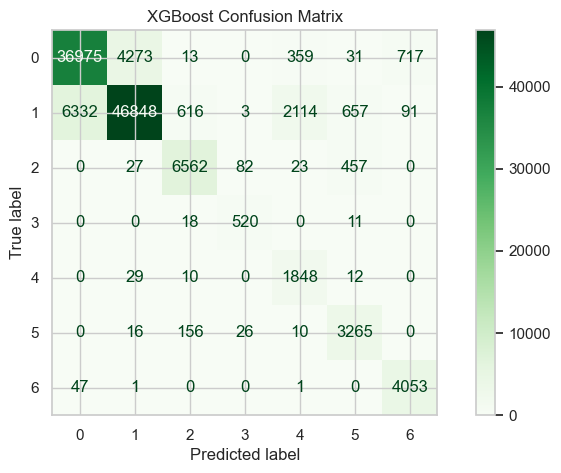

In [31]:
# Confusion Matrix - XGBoost
cm_xgb = confusion_matrix(y_test_xgb, xgb_preds_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot(cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.show()

The confusion matrix of the XGBoost classifier exhibits high overall classification performance. The majority of predictions will be located on the diagonal of the matrix, indicating high accuracy across the different cover types. In particular, classes 0 and 1 are the dominant classes in the dataset and therefore have a high number of true positive classifications; however, between the two classes there is significant confusion and in particular class 1 is often incorrectly predicted as class 0 and vice versa. This indicates that there are many common features between classes 0 and 1, which make separating these two classes difficult.

Classes 2, 3, 4, 5, and 6 all have reasonably good recognition with a relatively large proportion of the classifiers predictions being correct, as well as few off-diagonal errors. There is, however, moderate confusion between some classes; for example, class 1 is often predicted as class 4, and class 2 is sometimes confused with class 5. Prediction for the minority classes is also reasonable, suggesting that the XGBoost classifier is able to handle imbalanced data better than a naïve classifier.

The XGBoost classifier has performed well overall and has demonstrated good discrimination between classes, although there is still some confusion between ecologically similar classes, especially the two that dominate the dataset. Additional hyperparameter tuning, feature engineering, or advanced ensemble strategies may further reduce the confusion between class 0 and class 1 and improve overall classification performance.

## Feature Importance Analysis

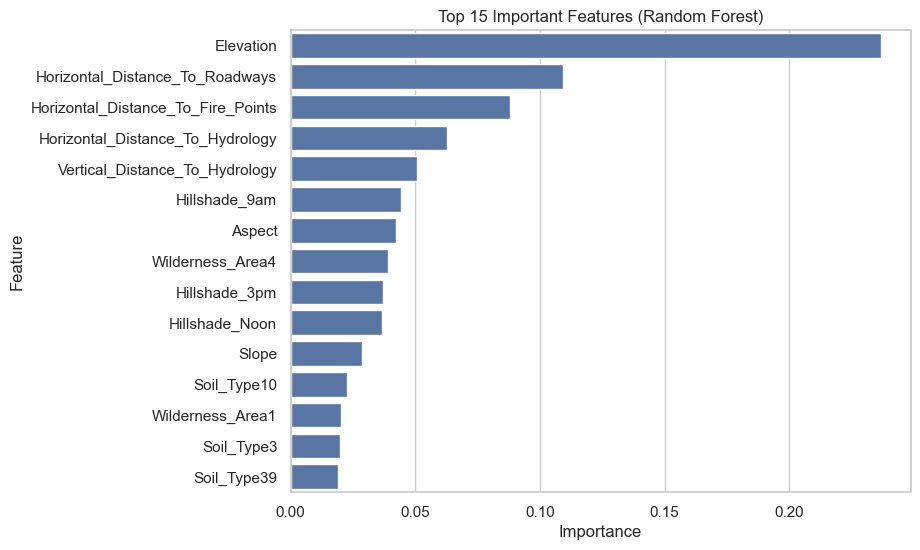

In [32]:
# Feature Importance - RF
importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

top_features = feature_importance_df.head(15)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=top_features)
plt.title("Top 15 Important Features (Random Forest)")
plt.show()

According to the Random Forest model's feature importance plot, Elevation is the most important predictor, with a noticeably higher influence on classification decisions compared to all other predictors combined; this is consistent with previous findings that support positively correlated elevation separation between the different classes of forest cover types. The next most important predictors are Horizontal Distance to Roadways and Horizontal Distance to Fire Points, which supports the conclusion that nearness to infrastructure and fire-related features is an important factor in determining what type of forest cover is present.

In addition, both horizontal and vertical distances to hydrology also rank similarly high in importance, which suggests that water nearness is a critical ecological factor. The three hillshade variables at 9am, Noon and 3pm as well as the Aspect variable each have a moderate level of importance for determining what type of forest cover exists based on their contribution of sunlight and the orientation of the land. The Slope of the land has a lower level of importance than the other top-ranking predictors and therefore does not contribute as much to predict what type of forest cover exists. The importance of soil and wilderness area indicators are located near the bottom of the 15 most important predictors.

Overall, the Random Forest model relies quite heavily on topographic (Elevation), distance in space and hydrologic predictors while confirming that classification of forest cover type is primarily due to the combination of land form and environmental conditions rather than just soil type.

## Final Model Comparison

In [33]:
print("Random Forest Accuracy:", round(rf_accuracy, 4))
print("XGBoost Accuracy:", round(xgb_accuracy, 4))

Random Forest Accuracy: 0.9551
XGBoost Accuracy: 0.8612


## Model Comparison

| Model            | Accuracy | Macro F1 | Weighted F1 |
|------------------|----------|----------|-------------|
| Random Forest    | 95.5%    | 0.93     | 0.95        |
| XGBoost          | 86.1%    | 0.83     | 0.86        |

### Observations

- Random Forest significantly outperformed XGBoost.
- Random Forest achieved strong balance between majority and minority classes.
- XGBoost showed overcompensation for minority classes due to class weighting.
- Macro F1 confirms that Random Forest maintains better stability across all classes.

### Feature Importance Insights

The most influential features were:

1. Elevation (dominant predictor)
2. Horizontal distance to roadways
3. Horizontal distance to fire points
4. Hydrology-related distances

This aligns with real-world geographical expectations, where altitude and proximity to infrastructure significantly affect vegetation type.

The Random Forest classifier was the best performing classifier in the Forest Cover Type classification task (95.5% accuracy) with solid macro F1 performance. The model was able to accurately represent nonlinear relationships in the data (elevation, slope and soil type) while requiring no feature scaling or complex preprocessing. Additionally, the framework was very effective in dealing with class imbalance through the implementation of class weighting, and resulting performance was good across the minority class.

Overall, the tree-based ensemble methods were very useful in modeling the large and structured tabular dataset.

### Recommendations

1. Use Random Forest as the main production classification model.
2. Optimize hyperparameter settings (GridSearch or Bayesian) to improve performance.
3. Complete cross-validation to help validate the model's consistency and reliability.
4. Utilize SHAP analysis to gain additional insight into the model's interpretation.
5. Consider using a stacking ensemble of models to achieve minimal performance gains.
6. Future work should explore the incorporation of spatial clustering variables into the predictive model.

This project is a good demonstration of effective strategies for managing large scale multi-class classification problems, good strategies for tackling class imbalance and producing thorough comparisons between models, following established industry benchmarking standards for evaluating performance.